In [133]:
import pandas as pd
import os
import re
import nltk
import numpy as np
import time
import matplotlib as plt 
import seaborn as sns
import sklearn
#os.chdir(r"C:\Users\csamassa\Desktop\Mémoire\Nouveau GDN")
os.chdir(r"C:\Users\Cheik\Desktop\mémoire")
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cheik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
start_time = time.time()

demo=pd.read_csv("DEMOCRATIE_ET_CITOYENNETE.csv", 
                 sep=",",
                 #nrows=10,
                 usecols=[0,10,2,11,13,14,16,17,19,20,22,23,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,46,47]
                 ,dtype={"authorZipCode":object}
                 )
fisc=pd.read_csv("LA_FISCALITE_ET_LES_DEPENSES_PUBLIQUES.csv", 
                 sep=",",
                 #nrows=10,
                 usecols=[0,10,2,11,12,13,14,15,16,17,18]
                 ,dtype={"authorZipCode":object}
                 )
eco=pd.read_csv("LA_TRANSITION_ECOLOGIQUE.csv", 
                sep=",",
                #nrows=10,               
                usecols=[0,10,2,11,12,14,16,17,18,20,22,23,24,25,26]
                ,dtype={"authorZipCode":object}
                )
                
org=pd.read_csv("ORGANISATION_DE_LETAT_ET_DES_SERVICES_PUBLICS.csv", 
                sep=",",
               #nrows=10,
                usecols=[0,10,2,11,13,15,16,19,20,21,24,25,27,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]
                ,dtype={"authorZipCode":object}
               )
print("--- %s seconds ---" % (time.time() - start_time))

--- 20.889212369918823 seconds ---


In [4]:
start_time = time.time()
# On rajoute une colonne comportant le thème de chaque question
demo.insert(column="Thème",value="DEMOCRATIE ET CITOYENNETE",loc=3)
fisc.insert(column="Thème",value="LA FISCALITE ET LES DEPENSES PUBLIQUES",loc=3)
eco.insert(column="Thème",value="LA TRANSITION ECOLOGIQUE",loc=3)
org.insert(column="Thème",value="ORGANISATION DE L'ETAT ET DES SERVICES PUBLIQUES",loc=3)


# On nettoie le début des questions
def clean_question(df):
    colonnes=df.columns
    colonnes1=[re.sub(pattern=r"\bQ[A-Za-z0-9]+\s+\-\s",repl='',string=nom) for nom in colonnes]
    return(colonnes1)



# On applique tt en même temps
demo.columns,fisc.columns,eco.columns,org.columns=clean_question(demo),clean_question(fisc),clean_question(eco),clean_question(org)
col1=["id", "authorZipCode","Thème"]

def empiller(df):
    stack_0=df.loc[:, ~df.columns.isin(col1)].stack(dropna=False) # prend les QO (toutes les questions sauf celles de col1)
    stack_1=stack_0.reset_index()                                 # On supp l'index pour avoir le level 0 pour la future jointure
    stack_2=stack_1.merge(df[col1],left_on="level_0",right_index=True,how="left")
    stack_2.columns=["idx_0","Question","Réponse","id","authorZipCode","Thème"] #idx_0 c'est le numéro de la ligne dans le fichier original de chaque thème 
    stack_2.dropna(inplace=True)
    return stack_2


demo_1,fisc_1,eco_1,org_1=empiller(demo),empiller(fisc),empiller(eco),empiller(org)

del(demo,fisc,eco,org)# On supp les variables inutiles de l'environnement

contributions_emp=pd.concat([demo_1,fisc_1,eco_1,org_1],axis=0)   #On met tout dans un même df
 
contributions_emp.reset_index(drop=True,inplace=True)

del(demo_1,fisc_1,eco_1,org_1,col1)

contributions_emp.drop(columns="id", inplace=True) # On supp la colonne (on a qu'à utiliser idx_0 si on veut la trace des contributions)


print("--- %s seconds ---" % (time.time() - start_time))

--- 9.230083703994751 seconds ---


In [5]:
contributions_emp

,idx_0,Question,Réponse,authorZipCode,Thème
0,0,title,Les augmentations de rémunérations,79190,DEMOCRATIE ET CITOYENNETE
1,0,En qui faites-vous le plus confiance pour vous...,Le citoyen,79190,DEMOCRATIE ET CITOYENNETE
2,0,Y a-t-il d'autres points sur la démocratie et ...,Afin d’éviter de creuser les inégalités ne plu...,79190,DEMOCRATIE ET CITOYENNETE
3,1,title,rénover l'enquête publique pour en faire un vr...,01800,DEMOCRATIE ET CITOYENNETE
4,1,En qui faites-vous le plus confiance pour vous...,Un instrument de démocratie locale à modernise...,01800,DEMOCRATIE ET CITOYENNETE
5,2,title,Limitations de vitesse et sécurité routière,44300,DEMOCRATIE ET CITOYENNETE
6,2,Y a-t-il d'autres points sur la démocratie et ...,Nous proposons le retour à la limitation de vi...,44300,DEMOCRATIE ET CITOYENNETE
7,3,title,Pour un nouveau contrat citoyen,29490,DEMOCRATIE ET CITOYENNETE
8,3,En qui faites-vous le plus confiance pour vous...,Voir l'intégralité de la proposition dans la d...,29490,DEMOCRATIE ET CITOYENNETE
9,3,Y a-t-il d'autres points sur la démocratie et ...,POUR UN NOUVEAU CONTRAT CITOYEN ...,29490,DEMOCRATIE ET CITOYENNETE


In [6]:
#start_time = time.time()

#contributions=pd.read_csv('contributions.csv',dtype={"authorZipCode":object})

#print("--- %s seconds ---" % (time.time() - start_time))

In [7]:
contributions=contributions_emp

In [8]:
start_time = time.time()

def compte_group(df,nom,fichier=None,export=False):
    resultat=df.loc[df["Réponse"].str.contains(nom,case=False, regex=True)]
    ###On va mettre chaque thème dans une feuille différente
    ##D'abord on filtre les résultats par thèmes
    resultat["nb_occurr"]=resultat.loc[:,"Réponse"].str.count(pat=nom, flags=re.I)
    if export==True:
        resultat_1=resultat.loc[resultat["Thème"]=="DEMOCRATIE ET CITOYENNETE"]
        resultat_2=resultat.loc[resultat["Thème"]=="LA FISCALITE ET LES DEPENSES PUBLIQUES"]
        resultat_3=resultat.loc[resultat["Thème"]=="LA TRANSITION ECOLOGIQUE"]
        resultat_4=resultat.loc[resultat["Thème"]=="ORGANISATION DE L'ETAT ET DES SERVICES PUBLIQUES"] # je sais que c'est public mais changer ça est trop chiant à faire pzrce que faudra changer le nom des thèmes (ou y'a la faute aussi)
    
        writer = pd.ExcelWriter(fichier+'.xlsx', engine='xlsxwriter')
    
        resultat_1.to_excel(writer, sheet_name="DEMOCRATIE")
        resultat_2.to_excel(writer, sheet_name="FISCALITE")
        resultat_3.to_excel(writer, sheet_name="TRANSITION_ECOLOGIQUE")
        resultat_4.to_excel(writer, sheet_name="ORGANISATION_DE_LETAT") 
    
        writer.save()
    return(resultat)

print("--- %s seconds ---" % (time.time() - start_time))


--- 0.0 seconds ---


On va prendre un exemple pour essayer notre code: toutes les contributions du GDN qui contiennent les mots pandémie, épidémie sras, coronavirus

In [9]:
start_time = time.time()
corona=compte_group(contributions,r"\bpand[e-é]mi[a-z]\b|\b[e-é]pid[e-é]mie\b|\bsras\b|\bcoronavirus\b")


print("--- %s seconds ---" % (time.time() - start_time))

#DF series.apply est plus rapide que df.apply

#On ne  prend que les contributions de plus d'une phrase


--- 47.499207496643066 seconds ---


C:\Users\Cheik\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [10]:
start_time = time.time()

aleo=corona["Réponse"].apply(nltk.sent_tokenize)
essai=pd.DataFrame(aleo.loc[aleo.apply(len)>1].apply(pd.Series).stack()).reset_index()#la fonction series fait que le séparateur devient la virgule entre chaque éléments de la liste, le stack fait qu'on les empile, on a un multi index où chaque index de level 0= numéro de la contribution, level 1= numéro de la phrase dans la contribution

#On ajoute le nombre de phrases de chaque contributions
essai_gpby=essai.groupby(by="level_0",as_index=False)[0].count()

essai=essai.merge(essai_gpby,on="level_0")


essai.columns=["level_0","nb_sent","sent","nb_sent_total"]
contain=essai.loc[essai["sent"].str.contains(r"\bpand[e-é]mi[a-z]\b|\b[e-é]pid[e-é]mie\b|\bsras\b|\bcoronavirus\b",regex=True,case=False)]

# On met dans un dictionnaire l'index de chaque phrase contenant notre pattern
dico_lvl_contain=dict(zip(contain.index,zip(contain["nb_sent"],contain["nb_sent_total"])))

print("--- %s seconds ---" % (time.time() - start_time))

#DF series.apply est plus rapide que df.apply

#On ne  prend que les contributions de plus d'une phrase

--- 0.32102537155151367 seconds ---


Pour chaque phrase qui contient les mots qu'on veut, on prend celle d'avant et celle d'après. 
Si jamais la phrase qui contient les patterns est la première, python va renvoyer une erreur lorsqu'on va lui demander 
de prendre la phrase d'avant vu qu'il n'y a rien avant, viceversa si c'est après. 
Pour résoudre cela, on va dire à python d'exclure la première lorsqu'on lui demandera de prendre les phrases x-1 et la dernière phrase quand on lui demande de prendre les phrases x+1 (encore une fois si y'a rien après x on va avoir une erreur index out of bounds). 
On a selectionné dans une autre opérationles phrases qui contiennent le pattern, cette opération a pour but de prendre x-1 et x+1 pas x. 
Si la première phrase contient le pattern, python ne va prendre que celle qui la suit, et si dernière phrase contient le pattern, python ne va prendre que celle qui la précède, 
Si la première et la deuxième phrase contiennent le patern, python va prendre celle qui la suit (x+1), et la ligne suivante python va de nouveau prendre la première (x-1, qui contient le pattern),  et la troisème (x+1), la deuxième étant x sur cette ligne (x+1 la ligne précédente)

In [11]:
start_time = time.time()

idx_avant=[[k-1,k,v] for (k,v) in dico_lvl_contain.items() if v[0]>0] #prend la phrase d'avant si la phrase  (celle qui matche le pattern) n'est pas la première de la contribution, donc d'index supérieur à 0
phrase_avant=essai.loc[[x[0] for x in idx_avant],]
phrase_avant["id_x"]=essai.loc[[x[1] for x in idx_avant],].index # On ajoute l'index des phrases qui contiennent la phrase du patern(celle d'après du coup si répond aux conditions du for)
phrase_avant.columns=["level_0","nb_sent_av", "sent_av","nb_sent_total","id_x"]

idx_apres=[[k+1,k,v] for (k,v) in dico_lvl_contain.items() if v[0]<(v[1]-1)] # # prend la phrase d'après si la phrase n'est pas la dernière de la contribution, donc d'index inférieure au nombre de phrases dans la contribution. on ajoute moins 1 parce que v[1] c'est la taille par ex 20 et v[0] c'est l'index (0:19) donc faut mettre v[1]-1 pour que ça corresponde

phrase_apres=essai.loc[[x[0] for x in idx_apres],]
phrase_apres["id_x"]=essai.loc[[x[1] for x in idx_apres],].index #On ajoute l'index des phrases du pattern (celle d'avant du coup si matche les conditions)
phrase_apres.columns=["level_0","nb_sent_ap", "sent_ap","nb_sent_total","id_x"]

contain=contain.rename_axis('id_x').reset_index() #On ajoute la colonne de l'id pour la jointure
essai_final=contain.merge(phrase_avant, on="id_x", how="outer").merge(phrase_apres,on="id_x",how="outer") #On fait une union des trois dataframes
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.01594829559326172 seconds ---


In [72]:
essai_final.loc[:,["sent_av","sent","sent_ap"]]

,sent_av,sent,sent_ap
0,Que tous les profs les informent de l’existenc...,"Lutte contre EPIDEMIE sida, diminution nb d’av...",Tous les enfants ont les mêmes droits.
1,qui est une injustice sociale exorbitante au r...,Prévue pour faire face aux risques d'épidémie ...,Elle donne donc lieu à une immigration sanitai...
2,"Ensuite la langue, les lois, les DEVOIRS.",Si leur dossier est recevable parce que la gue...,Si comme dirait le Premier Ministre Néozélanda...
3,,Il faut pourvoir distinguer les asiles d'urgen...,"Pour les autres, il faut faire appliquer des c..."
4,"Par exemple, l'histoire du vaccin pandémique.","Comme l'épidémie n'a pas eu lieu, les Français...","Par contre, il faut que l'état soit exemplaire..."
5,Pour l'immigration clandestine : Rendre notre...,Chaque aide financière ou aide donnée par l'Et...,
6,Le culte du pré-carré n'est hélas pas réservé ...,C'est une pandémie grave sans vaccin ni sérum.,"Les réseaux dits ""sociaux"", par leur anonymat,..."
7,"Lors du vote des lois, il faudrait que les org...",les exemples ne manquent pas dans des domaines...,
8,,"Les personnes ""racisées"" font plus l'objet de ...","Il existe encore une attitude de ""victim-blami..."
9,,Le manque de respect est une pandémie et la so...,Cela va bien au-delà des figures traditionnell...


In [13]:
essai_final['sent_av']=essai_final['sent_av'].astype(str).replace('nan','')
essai_final['sent_ap']=essai_final['sent_ap'].astype(str).replace('nan','')


In [14]:
essai_final["phrase_av_ap"]=essai_final[['sent_av', 'sent','sent_ap']].apply(lambda x: ''.join(x), axis=1)


In [116]:
def stop_words(liste=False):
    stopwords=pd.read_csv("stopwords.csv",sep=';')
    nvx_stpwds=pd.DataFrame(liste,dtype=str)
    stopwords=pd.concat([stopwords["a"],nvx_stpwds[0]],axis=0,ignore_index=True)
    stopwords=pd.concat([stopwords,stopwords.str.upper(),stopwords.str.capitalize()],axis=0, ignore_index=True)
    
    return(stopwords.tolist())
stopwords=stop_words(['oui','non','faut','faudrait',"une","qu","il"])


In [124]:
essai_final["text_processed"] = essai_final["phrase_av_ap"].map(lambda x: re.sub('[,\.!?:]', ' ', x))
essai_final["text_processed"]=essai_final["text_processed"].map(lambda x:' '.join([word for word in x.split() if word not in (stopwords)]))#On enlève les stopwords

In [125]:
essai_final["text_processed"]

0      profs informent l’existence diu cuivre hormone...
1      injustice sociale exorbitante regard situation...
2      Ensuite langue lois DEVOIRS dossier recevable ...
3      pourvoir distinguer asiles d'urgence raison gu...
4      exemple l'histoire vaccin pandémique l'épidémi...
5      l'immigration clandestine Rendre pays attracti...
6      culte pré-carré n'est réservé qu'aux élites C'...
7      Lors vote lois organisations syndicales profes...
8      "racisées" l'objet contrôle police LGBT l'obje...
9      manque respect pandémie source incivilités au-...
10     Pénaliser manquement vie société délits crimes...
11     République garantir valeurs devise « Liberté E...
12     expulser rapidement déboutés droit d'asile san...
13     suffit comparer chiffres démographie l'éducati...
14     système médical extrêmement couteux épidémie g...
15     difficilement applicable cas d'épidémie guerre...
16     L'usage d'internet réseaux sociaux mois a cont...
17     lieu respecter immigrés 

In [129]:
#Prep LDA
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer #Pour représenter les données textuelles au format sac de mots

sns.set_style('whitegrid')
%matplotlib inline
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 mots les plus communs')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('mots')
    plt.ylabel('nombre')
    plt.show()

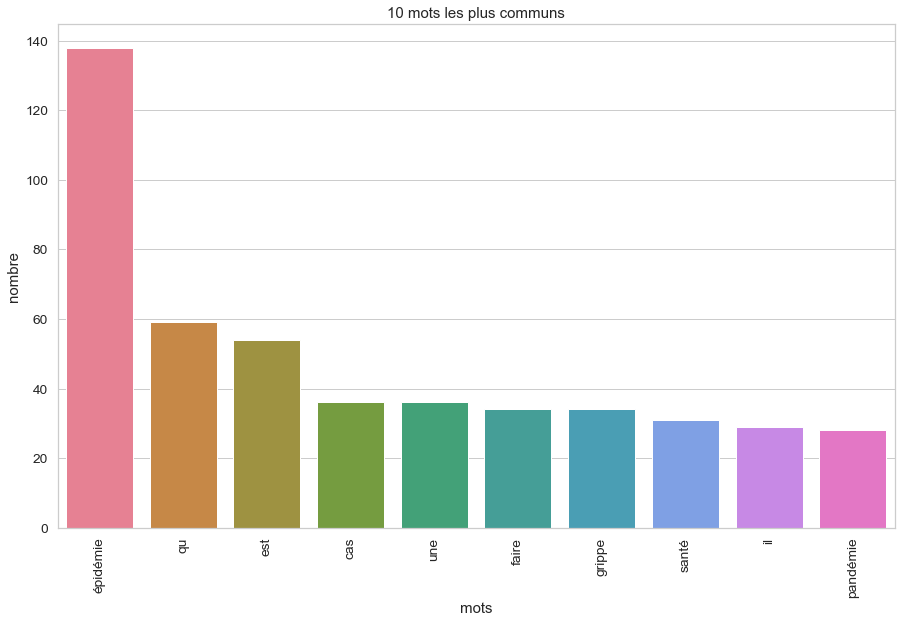

In [130]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer()
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(essai_final["text_processed"])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [136]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

ImportError: cannot import name '_raise_dep_warning_if_not_pytest' from 'sklearn.utils.deprecation' (C:\Users\Cheik\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py)